Binary classification,
multi class classification,
---------------------------
- softmax func

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 

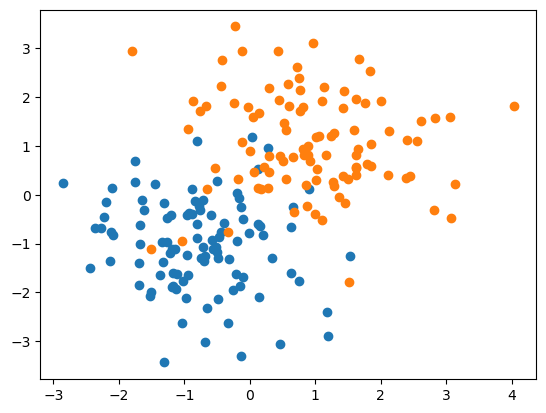

In [28]:
m = 100 # per class 
np.random.seed(1) 
X1 = np.random.randn(m, 2) 
X2 = np.random.randn(m, 2) 
u = np.ones(2) * 1.0 
X1 = X1 - u; X2 = X2 + u 
plt.scatter(X1[:, 0], X1[:, 1]) 
plt.scatter(X2[:, 0], X2[:, 1])
y1 = np.zeros(m); y2 = np.ones(m) # 0 or 1 
X = np.r_[X1, X2] 
y = np.r_[y1, y2] 

In [29]:
X.shape, y.shape 

((200, 2), (200,))

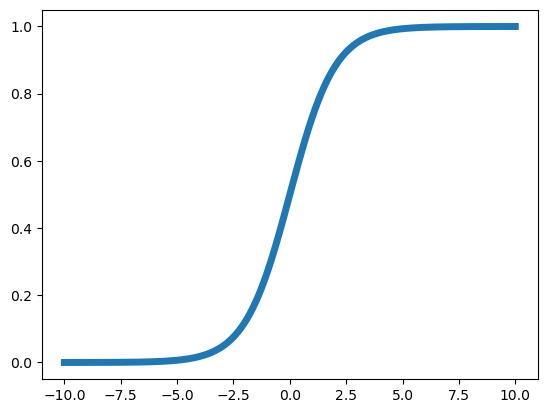

In [30]:
def sigmoid(z): 
    return 1 / (1 + np.exp(-z)) 
z = np.linspace(-10, 10, 10001) 
k = 1.0
s = sigmoid(k * z) # softmax === sigmoid 
plt.plot(z, s, lw=5) 

$$z = X w + b$$ 
$$h = \sigma(z) = \frac 1 { 1 + e^{-z}}$$ 
$$J = -\frac 1 m \sum_{i=1}^m y_i \ln h_i + (1 - y_i) \ln (1 - h_i)$$ 
$$\frac{dz}{dw} = X^T, \frac{dz}{db} = \begin{bmatrix} 1\\ \vdots \\ 1\end{bmatrix}^T$$
$$\frac{dh}{dz} = h \cdot (1 - h) $$
$$\frac{dJ}{dh} = -\frac 1 m [y\cdot \frac 1 h - (1-y)\frac 1 {1-h} ]$$
$$\frac{dJ}{dz} = (h-y) / m $$
$$\frac{dJ}{dw} = X^T(h - y) / m, \frac{dJ}{db} = \sum(h - y) / m$$

In [31]:
def cost(y, h): 
    J = (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) 
    return - J / len(y) 
def gradient(X, y, h): 
    # dJ / dw, dJ / db  z = Xw + b 
    # .dot is same as @ 
    m = len(y) 
    dw = X.T.dot(h - y) / m 
    db = np.sum(h - y) / m 
    return dw, db 

In [32]:
w = np.zeros(2) 
b = 0.0 
lr = 0.1 
Js = [] 
for i in range(1000): 
    z = X.dot(w) + b 
    h = sigmoid(z) 
    J = cost(y, h) ; Js.append(J) 
    dw, db = gradient(X, y, h) 
    w = w - lr * dw 
    b = b - lr * db 

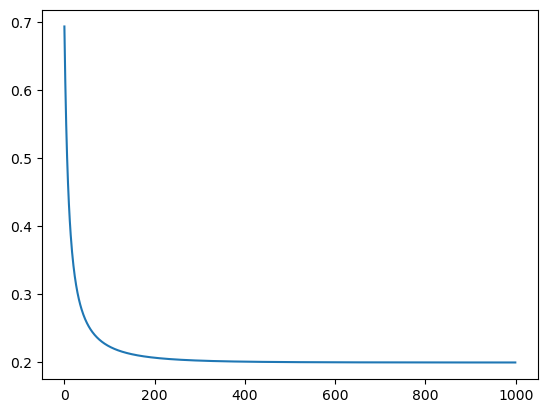

In [33]:
plt.plot(Js) 

### What is boundary? 
- boundary: $\sigma(z) = 0.5$ 
- solution: $z = Xw + b = X_1 w_1 + X_2 w_2 + b = 0$
- sample $X_1$ 
- $X_2 = -(X_1w_1 + b) / w_2 $ 

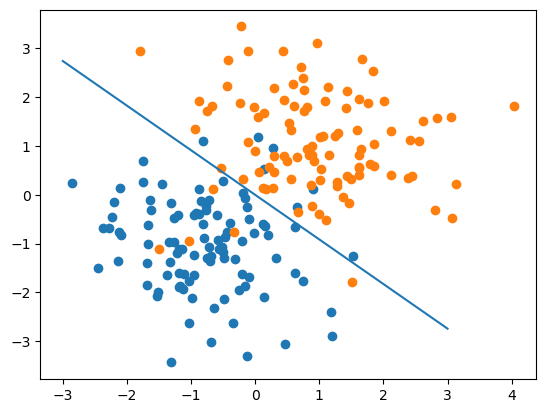

In [34]:
x1 = np.linspace(-3, 3) 
x2 = -(x1 * w[0]) / w[1]   # in python: w:w[0], w[1], in formula, w: w_1, w_2 
plt.scatter(X1[:, 0], X1[:, 1]) 
plt.scatter(X2[:, 0], X2[:, 1]) 
plt.plot(x1, x2) 

In [35]:
# accuracy 
 
z = X @ w + b 
h = sigmoid(z) 
pred = h > 0.5 
acc = pred == y 
acc = np.sum(acc) / len(y) 
print("The classification accuracy: {:.2f}%".format(acc * 100) )

The classification accuracy: 94.00%
